- 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [346]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

# boston 데이타셋 로드
boston=load_boston()

In [347]:
# 필요한 dataset을 모듈을 통해 불러오기
# 판다스 데이터 분석 처리
# 데이터프레임(2차원), 시리즈(1차원)
# 넘파이 다차원 행렬 자료구조인 ndarray를 통해 벡터 및 행렬을 사용하는 선형 대수 계산에서 주로 사용

In [348]:
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE']=boston.target
print('Boston 데이터셋 크기',bostonDF.shape)
bostonDF

Boston 데이터셋 크기 (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [349]:
# 보스턴데이터를 데이터프레임으로 변경(2차원 배열_행,열)
# pd.DataFrame(데이터명.data, columns=열)
# 타겟선정(y)
# 데이터 확인(크기, 타입, 모양 등)
# 데이터 출력

- 데이터를 행과 열로 만들기

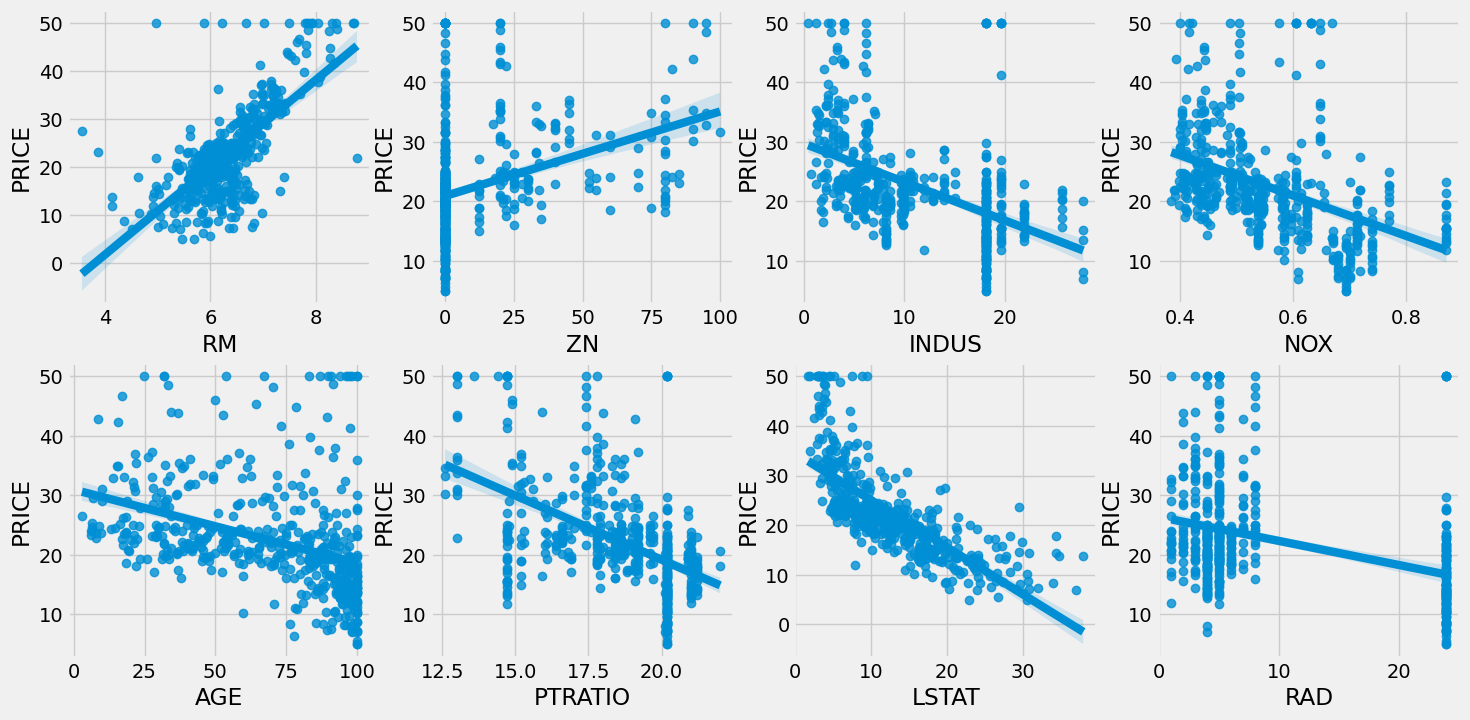

In [350]:
fig,axs=plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features=['RM','ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features): # 8개 범위
    row=int(i/4) # 1 or 2가 나옴(4,8)
    col=i%4
    # seaborn의 regplot을 이용해 산점도와 회귀 작성을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col]) # 자리를 고정해 두고 그림(4,2)
    # flatten()은 먼저 그리고 자리 위치 배열함

In [351]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_data, y_target, test_size=0.3,
                                                  random_state=156)

# linear Regression OLS(ordinary Least Square(OLS)method) 
# error function을 gradient method로 학습/예측/평가 수행
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score:{0:.3f}'.format(r2_score(y_test,y_preds)))

MSE:17.297, RMSE:4.159
Variance score:0.757


In [352]:
print('절편 값:', lr.intercept_)
print('회귀계수값:', np.round(lr.coef_,1))

절편 값: 40.995595172164435
회귀계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [353]:
# 회귀계수를 큰 값 순으로 정렬하기 위해 Series로 생성, index가 컬럼명에 유의
coeff=pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)
# 회귀계수값이 클수록 종속변수에 영향을 끼치나 다중공선성(계수분산이 커짐) 문제 고려해야함. 

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### K-fold cross validation
K 겹 교차 검증(Cross validation)이란 통계학에서 모델을 "평가" 하는 한 가지 방법입니다. 소위 hold-out validation 이라 불리는 전체 데이터의 일부를 validation set 으로 사용해 모델 성능을 평가하는 것의 문제는 데이터셋의 크기가 작은 경우 테스트셋에 대한 성능 평가의 신뢰성이 떨어지게 된다는 것입니다. 만약 테스트셋을 어떻게 잡느냐에 따라 성능이 다르면, 우연의 효과로 인해 모델 평가 지표에 편향이 생기게 됩니다.



이를 해결하기 위해 K-겹 교차 검증은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 합니다. 아래의 그림을 보면, 데이터를 5개로 쪼개 매번 테스트셋을 바꿔나가는 것을 볼 수 있습니다. 첫 번째 Iteration에서는 BCDE를 트레이닝 셋으로, A를 테스트셋으로 설정한 후, 성능을 평가합니다. 두 번째 Iteration에서는 ACDE를 트레이닝셋으로, B를 테스트셋으로하여 성능을 평가합니다. 그러면 총 5개의 성능 평가지표가 생기게 되는데, 보통 이 값들을 평균을 내어 모델의 성능을 평가하게 됩니다. (아래 데이터는 모두 사실은 트레이닝 데이터입니다. Iteration이라는 상황안에서만 테스트셋이 되는 것입니다.) 이 때, 데이터를 몇 개로 쪼갰느냐가 K-겹 교차검증의 K가 됩니다.

<figure>
    <img src='https://t1.daumcdn.net/cfile/tistory/990DD2465B72F1491E' width=500 height=300>
</figure>



출처: https://3months.tistory.com/321 [Deep Play]

- 과적합(overfitting)을 방지하는 것이 중요하다.
  - 과적합이란 train에서 성능이 좋고 Test에서 성능이 좋지 않은 것
- 반대는 과소적합(underfitting)

#### 회귀 모델 성능 평가 지표
- MAE(Mean Absolute Error) = 평균 절대 오차
  - 실제 정답 값과 예측 값의 차이를 절댓값으로 변환한 뒤 합산하여 평균
- MSE(Mean Squared Error) = 평균 제곱 오차
  - 실제 정답 값과 예측 값의 차이를 제곱한 뒤 평균
- RMSE(Root Mean Squared Error) = 평균 제곱근 오차
  - MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다. (값이 낮을수록 좋음)
- MAPE(Mean Absolute Percentage Error) = 평균 절대 비율 오차
  - MAE를 비율, 퍼센트로 표현하여 스케인 의존적 에러의 문제점을 개선(값이 낮을수록 좋음)
- R2 score = R squard
  - 선형 회귀 모델에 대한 적합도 측정값

In [354]:
from sklearn.model_selection import cross_val_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr=LinearRegression()

# K-Fold Cross Validation
# cross_val_score()로 5Fold셋으로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구함

neg_mse_scores=cross_val_score(lr,X_data, y_target,scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores) # -(negative)를 해야 실제값이 보임
avg_rmse=np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 변환된 값은 모두 음수
# 회귀의 값은 작아지면 좋으니 마이너스를 취하면 작으면 작아지는게 좋음
print('5 folds의 개별 negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 folds의 평균 scores:{0:.3f}'.format(avg_rmse))


5 folds의 개별 negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 scores:5.829


 - 데이터 셋: kaggle titanic(https://www.kaggle.com/c/titanic)

In [355]:
import pandas as pd
import matplotlib.pyplot as plt

train=pd.read_csv('C:/Users/405/my_study/Python_Study/0510/train.csv')
test=pd.read_csv('C:/Users/405/my_study/Python_Study/0510/test.csv')

#### 탐색적 자료 분석(Exploratory Data Analysis(EDA))


 - survived : 생존=1, 죽음=0
 - pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
 - sibsp : 함께 탑승한 형제 또는 배우자 수
 - parch : 함께 탑승한 부모 또는 자녀 수
 - ticket : 티켓 번호
 - cabin : 선실 번호
 - embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown


In [356]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [357]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [358]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [359]:
print(train.shape, test.shape)

(891, 12) (418, 11)


In [360]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [361]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [362]:
train[train['Survived']==1]['Sex']

1      female
2      female
3      female
8      female
9      female
        ...  
875    female
879    female
880    female
887    female
889      male
Name: Sex, Length: 342, dtype: object

In [363]:
train[train['Survived']==1]['Sex'].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

In [364]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts() # 생존자 카운트
    dead=train[train['Survived']==0][feature].value_counts() # 사망자 카운트
    df=pd.DataFrame([survived,dead]) # [생존자 사망자]를 DataFrame
    df.index=['Survived','Dead'] # index화
    df.plot(kind='bar', stacked=True, figsize=(10,5)) # 그림을 그림

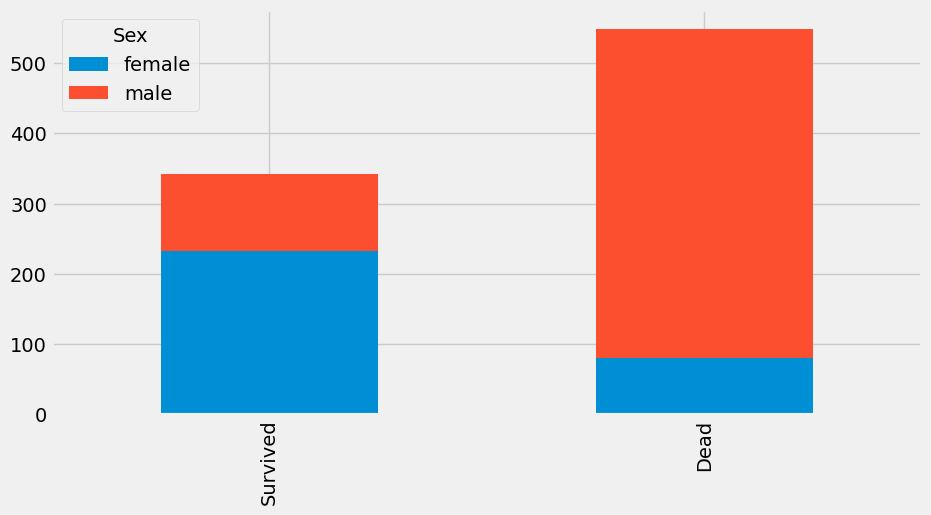

In [365]:
bar_chart('Sex') # 무슨 이유로 남성분들이 더 많이 사망하였을까?

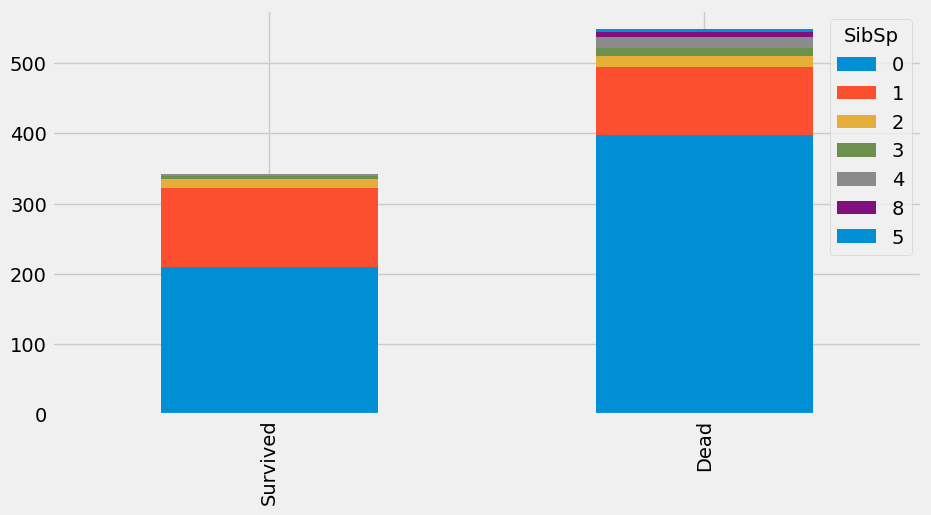

In [366]:
bar_chart('SibSp') # 함께 탑승한 형제 또는 배우자 수에 따라서 생존이 왜 다를까?

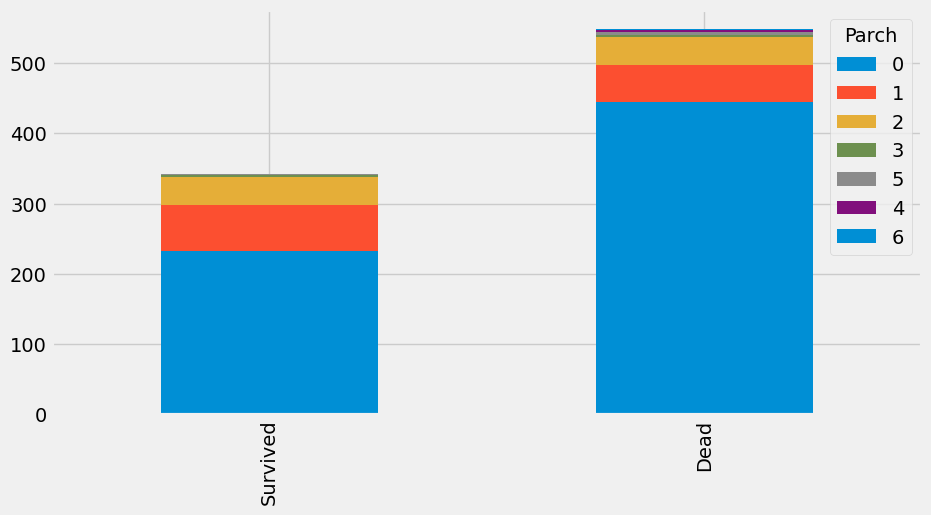

In [367]:
bar_chart('Parch') # 함께 탑승한 부모 또는 자녀 수

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

- exploed : 각 항목이 파이의 원점에서 튀어나오는 정도를 나타냄
- autopct : 각 항목의 퍼센트를 표시
- 퍼센트를 파이차트 안에 표시
  - autopct = '%.1f' 소수 첫째자리까지 표시
  - autopct = '%.2f 소수 둘째자리까지 표시
  - autopct = '%.1f%%' 퍼센트까지 포함
- shadow : 그림자를 그릴것인가?
  - True면 그림

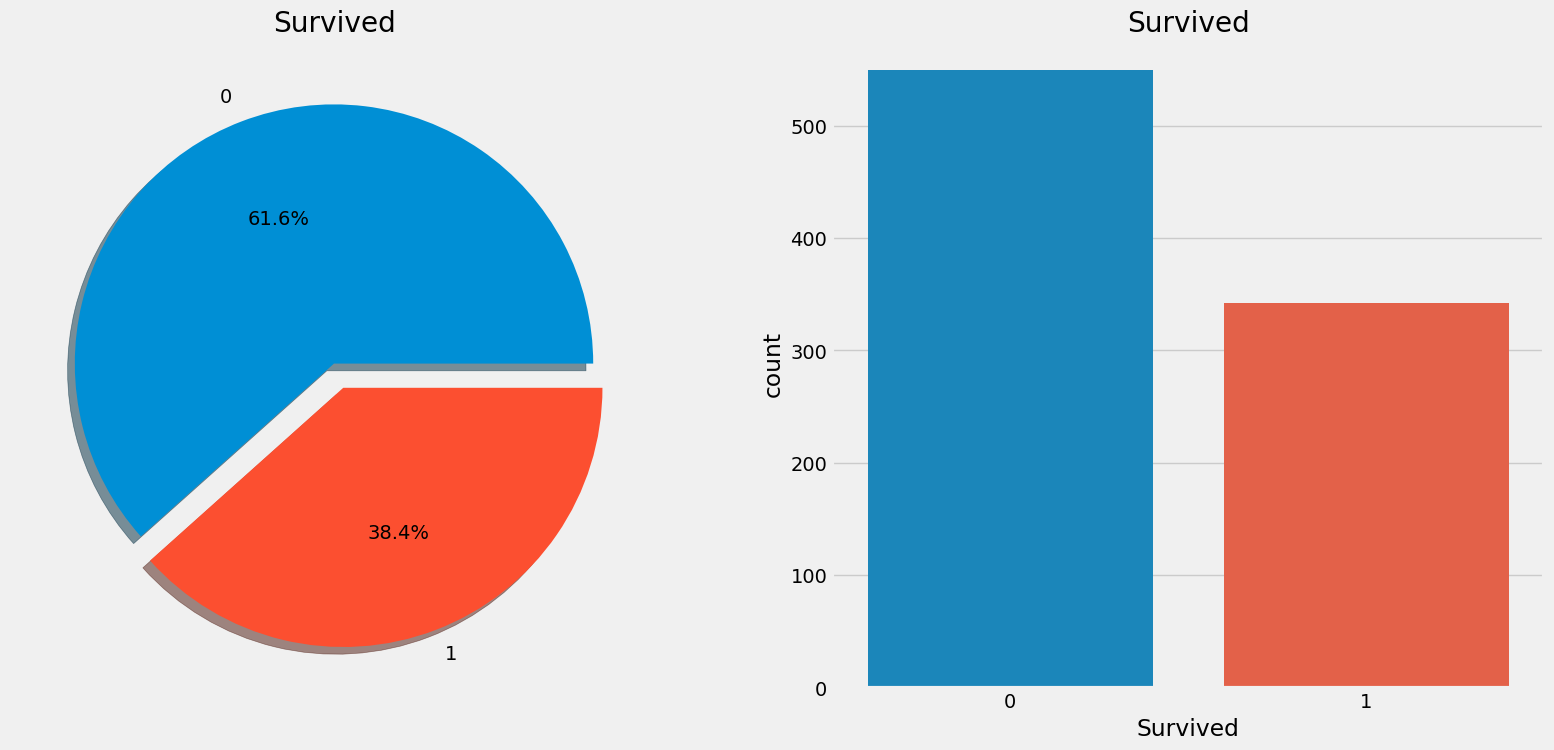

In [369]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x=train['Survived'],ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [370]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


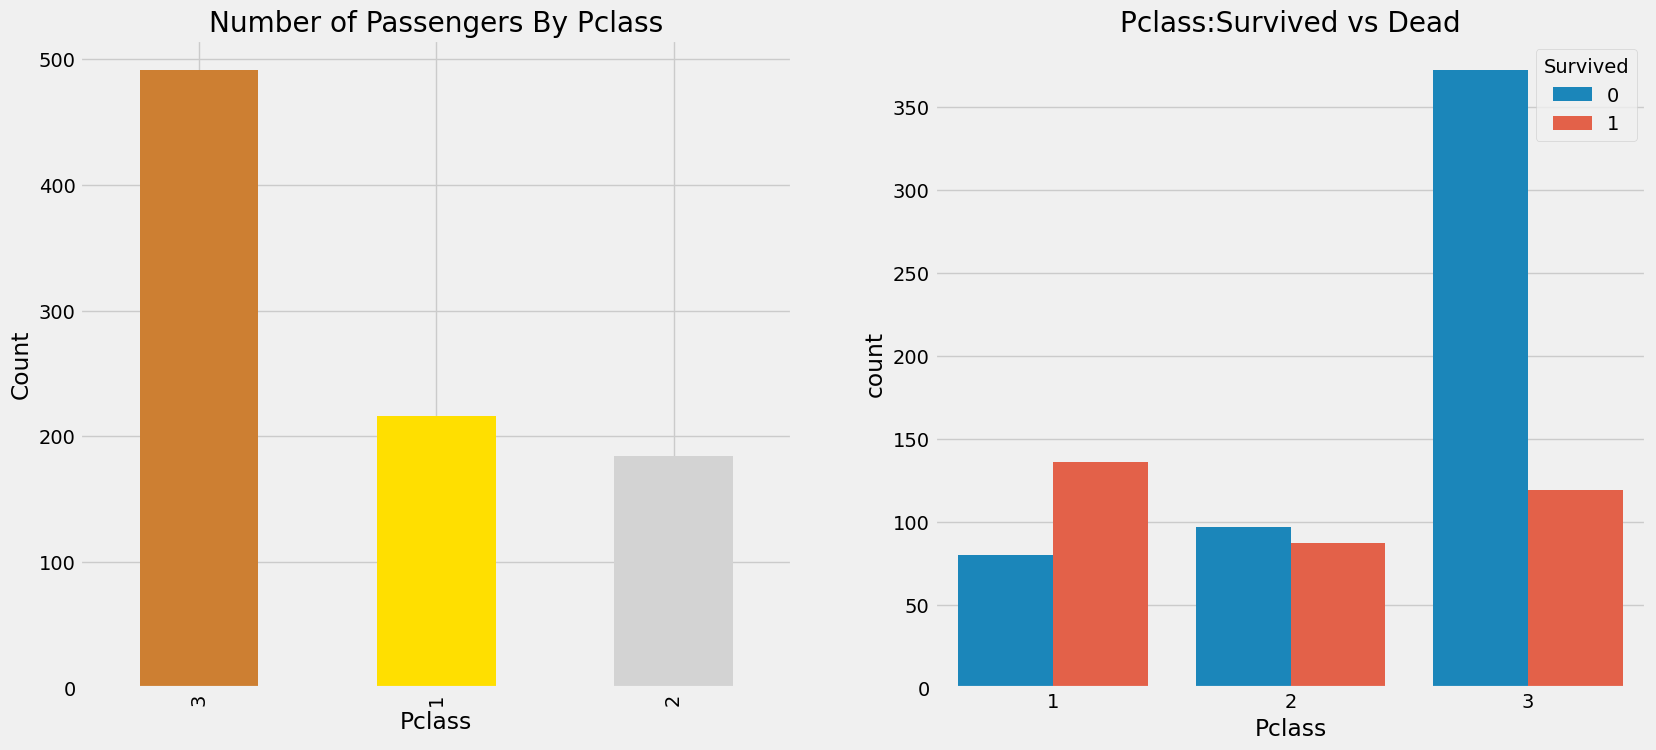

In [371]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [372]:
pd.crosstab(train.Sex, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


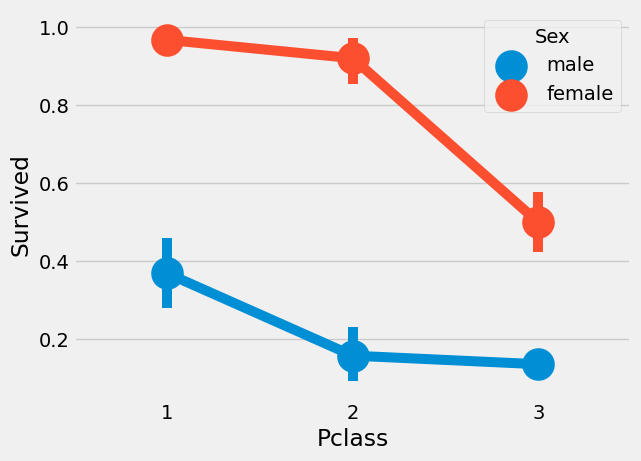

In [373]:
sns.pointplot(x='Pclass',y='Survived', hue='Sex', data=train)
plt.show()

In [374]:
print('Oldest Passeneger was of :',train['Age'].max(), 'Years') 
print('Youngest Passeneger was of :',train['Age'].min(), 'Years')
print('Average Age on the ship :',train['Age'].mean(), 'Years') # 평균
print('Median Age on the ship :',train['Age'].median(), 'Years') # 중위수(중앙값)
print('Mode Age on the ship :',train['Age'].mode(), 'Years') # 최빈값(많이 나오는 값)

Oldest Passeneger was of : 80.0 Years
Youngest Passeneger was of : 0.42 Years
Average Age on the ship : 29.69911764705882 Years
Median Age on the ship : 28.0 Years
Mode Age on the ship : 0    24.0
Name: Age, dtype: float64 Years


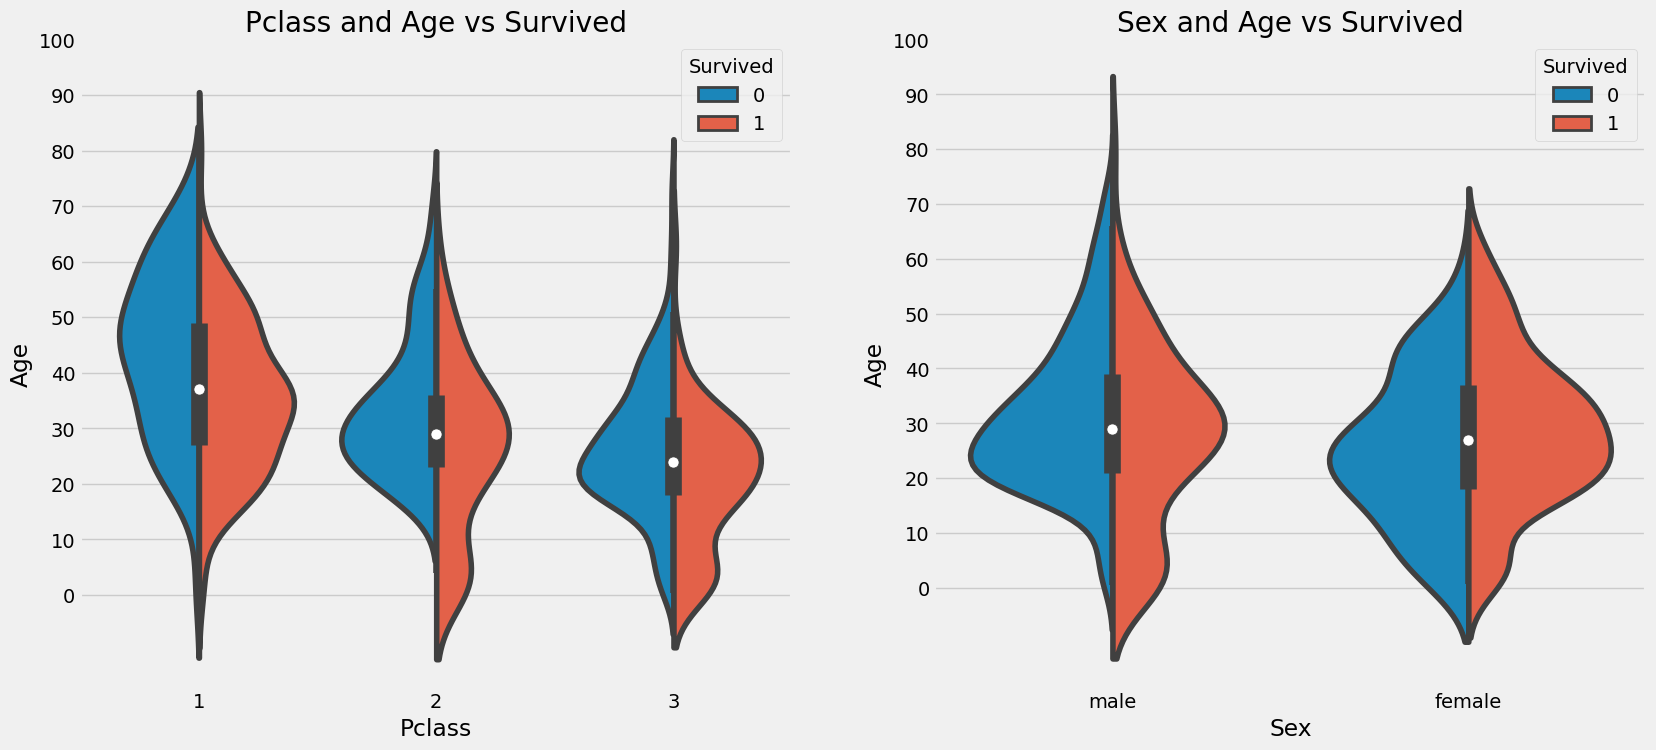

In [375]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass', y='Age', hue='Survived',data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [376]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [377]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [378]:
train['Name'].str

In [379]:
train['Name'].str.extract('([A-Za-z]+)\.',expand=False)
#[A-Za-z]+)\. : 정규표현식(regular expression)
# -> 규칙 : 대문자나 소문자로 시작하다가 .으로 끝나면 추출해주세요.


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [380]:
train_test_data=[train,test]
# Name에 따라서 뭐가 다른가?->전에 각각 해당하는 value를 count 함
for dataset in train_test_data:
    dataset['Title']=train['Name'].str.extract('([A-Za-z]+)\.',expand=False)
# extract('([A-Za-z]+)\.'-> 정규표현식
# A-Z와 a-Z를 찾아서 어느지점에서 끝내는가? .을 기준으로 해서 자르라는 이야기 그 다음에 count

In [381]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

- expand

In [382]:
import numpy as np
import pandas as pd

s2=pd.Series(['a_b_c','c_d_e', np.nan, 'f_g_h'], dtype='string')
s2

0    a_b_c
1    c_d_e
2     <NA>
3    f_g_h
dtype: string

In [383]:
s2.str.split('_')

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

In [384]:
s2.str.split('_',expand=True) # 데이터 프레임 형식 함

,0,1,2
0,a,b,c
1,c,d,e
2,<NA>,<NA>,<NA>
3,f,g,h


In [385]:
s2.str.split('_',expand=False) # 데이터 프레임 형식 안함

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

In [386]:
s2.str.split('_',expand=True,n=1)

,0,1
0,a,b_c
1,c,d_e
2,<NA>,<NA>
3,f,g_h


In [387]:
s2.str.split('_',expand=True,n=2)

,0,1,2
0,a,b,c
1,c,d,e
2,<NA>,<NA>,<NA>
3,f,g,h


- one-hot encoding

In [388]:
# 극단적으로 나눔
title_mapping = {'Mr':0, "Miss":1, 'Mrs':2,'Master':3,
                 'Dr':3,'Rev':3,'Col':3,'Major':3,'Mlle':3,'Ms':3,'Sir':3,'Don':3,'Countess':3,
                 'Capt':3,'Lady':3,'Jonkheer':3,'Mme':3}
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping) # 모든 피쳐에 적용해주세요

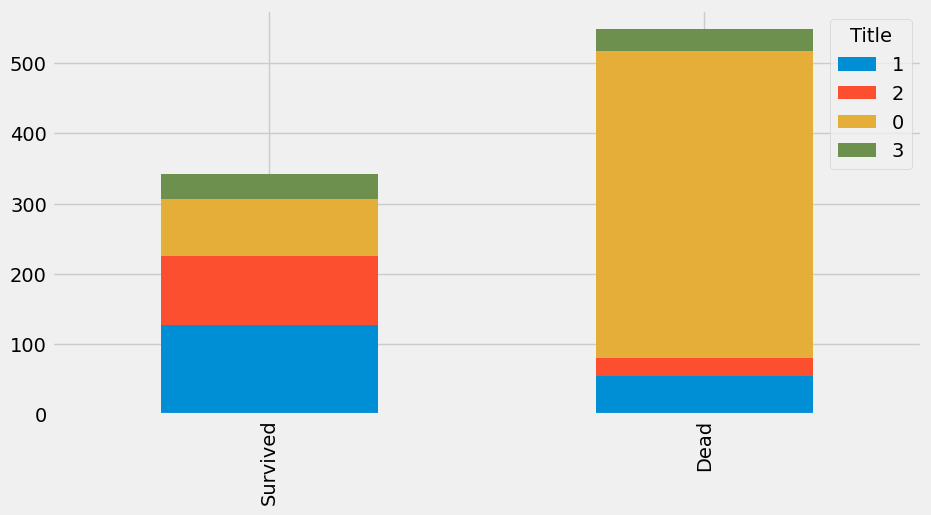

In [389]:
bar_chart('Title')

In [390]:
sex_mapping={'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)
# method:sklearn.preprocessing import OneHotEncoder, pandas의 get_dummies

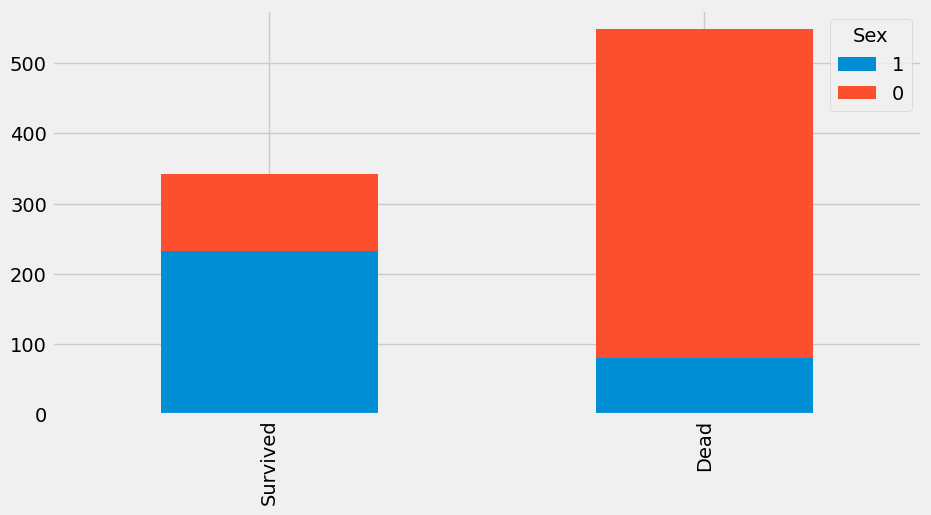

In [391]:
bar_chart('Sex')

In [392]:
pd.crosstab(train['Title'],train['Sex'])

Sex,0,1
Title,,
0,517,0
1,0,182
2,0,125
3,60,7


- 결측치 처리

In [393]:
# missing Age를 각 Title에 대한 연령의 중간값으로 채움(Mr,Mrs,Miss,others) inplace는 채우기?
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
# train에 결측치를 처리 했다면, test에도 똑같이 처리해줘야함
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)

In [394]:
train['Age'].isna().sum() # 결측치를 처리하고 꼭 다시 체크

0

In [395]:
train[['Title','Age']].groupby(['Title'],as_index=False).mean() # as_index=False : title열이 인덱스 되지 않게 하여 일반 열로 유지되게함

,Title,Age
0,0,31.823017
1,1,21.620879
2,2,35.776000
3,3,19.577164


- 가설2. 사망자의 나이가 어떻게 될까?+ 생존자

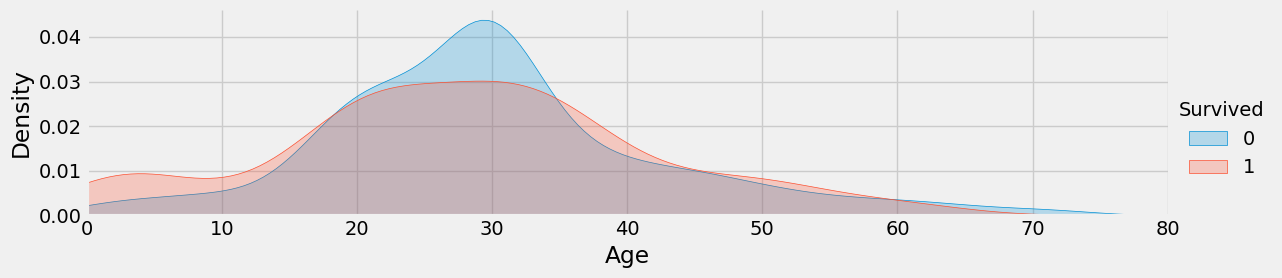

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns
# 변수의 분포를 시각화하거나, 여러 변수들 사이의 상관관계를 여러개의 그래프로 쪼개서 표현할 때 유용
# FeactGrid는 Colum,row,hue를 통한 의미구분을 통해 총 3차원까지 구현이 가능함.
# aspect:subplot의 세로 대비 가로의 비율

facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age', shade=True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')
# plt.xlim(20,30) 20,30 나이대 구간별로 잘라서 확인 가능

plt.show()
# 20,30대에 사망률>생존율 보다 높다 왜그럴까?

- 0~80세까지 들어있음. 너무 많다. Pandas ->Binning 기술을 씀 (연속형 변수를 특정한 구간으로 잘라서 범주형으로 만들어주는 기술)

잇달아 일어나는 형태의 데이터는 많은 정보를 주지 못하므로 이럴땐 각각 하나의 카테고리에 나이를 담아 정보를 보다 명확하게 확인할 수 있는 방법

In [397]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age']=0, # 콤마로 연결을 하면 multi index로 받아들여서 동시에 처리가 불가
    dataset.loc[((dataset['Age'] >16) and (dataset['Age']<=26)),'Age']=1

ValueError: Must have equal len keys and value when setting with an iterable

In [398]:
for dataset in train_test_data: 
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0 # 비트 연산자 사용
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1 
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2 
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3 
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
  dataset['Age'] = dataset['Age'].map( { 0: 'Child', 1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

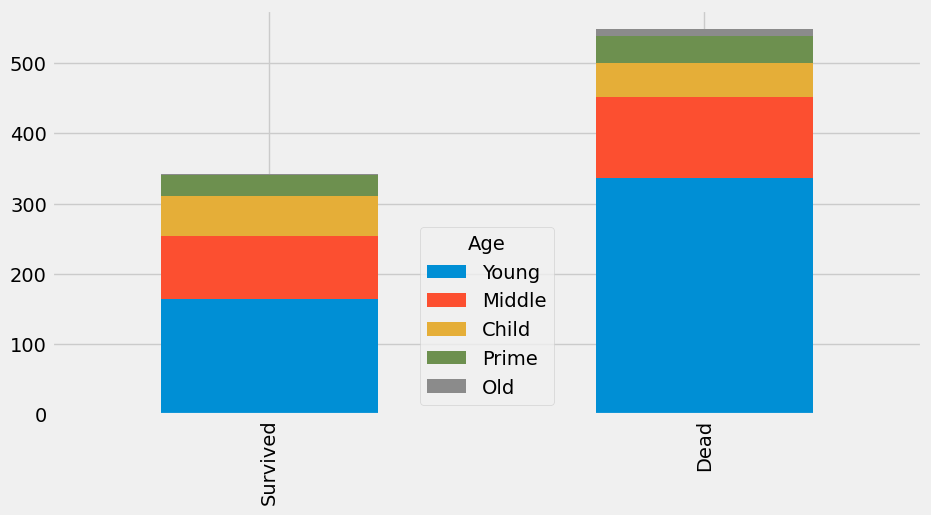

In [399]:
bar_chart('Age')

- family size
  - 함께 동승한 부모님과 아이들의 수와 형제와 배우자수
  - 혼자 탄 사람과 가족이 탄 사람은 어떻게 다를까?
  - SibSp+Parch

In [400]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1
# 숫자 0부터 카운트되기 때문에 +1을 더해줌(솔로일 가능성)

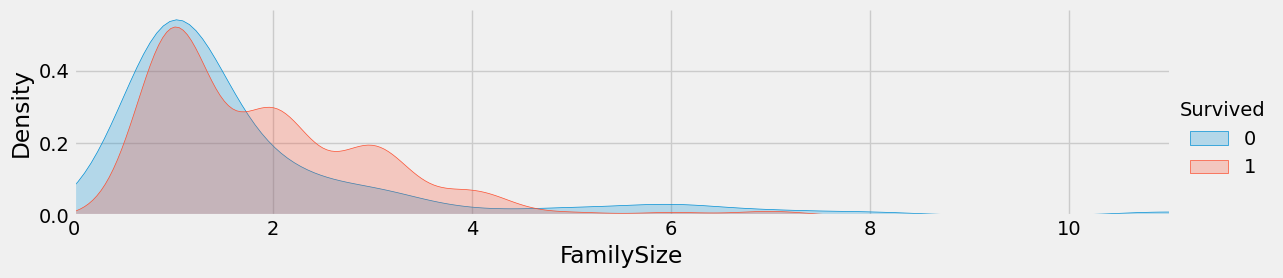

In [401]:
facet=sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True) # kde 이차원 밀집 그래프
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

plt.show()

- 혼자일 경우 사망률, 생존율이 높음

In [402]:
X_train=train.drop(['Survived','PassengerId'],axis=1)
y_train=train['Survived']
X_test=test.drop('PassengerId',axis=1).copy()

In [403]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,3,"Braund, Mr. Owen Harris",0,Young,1,0,A/5 21171,7.2500,NaN,S,0,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Middle,1,0,PC 17599,71.2833,C85,C,2,2
2,3,"Heikkinen, Miss. Laina",1,Young,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Middle,1,0,113803,53.1000,C123,S,2,2
4,3,"Allen, Mr. William Henry",0,Middle,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",0,Young,0,0,211536,13.0000,NaN,S,3,1
887,1,"Graham, Miss. Margaret Edith",1,Young,0,0,112053,30.0000,B42,S,1,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,Young,1,2,W./C. 6607,23.4500,NaN,S,1,4
889,1,"Behr, Mr. Karl Howell",0,Young,0,0,111369,30.0000,C148,C,0,1


In [404]:
X_test.isna().sum()

Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin         327
Embarked        0
Title           0
FamilySize      0
dtype: int64

In [406]:
X_test['Fare'].fillna(0,inplace=True)

In [407]:
# 원핫인코딩이 힘들어 dntjs 포기
X_train.drop('Name',axis=1,inplace=True)
X_test.drop('Name',axis=1,inplace=True)

In [408]:
X_train.drop('Ticket',axis=1,inplace=True)
X_test.drop('Ticket',axis=1,inplace=True)

In [409]:
X_train.drop('Cabin',axis=1,inplace=True)
X_test.drop('Cabin',axis=1,inplace=True)

In [410]:
X_train.drop('Age',axis=1,inplace=True)
X_test.drop('Age',axis=1,inplace=True)

In [411]:
X_train.drop('Title',axis=1,inplace=True)
X_test.drop('Title',axis=1,inplace=True)

In [412]:
X_train.drop('Embarked',axis=1,inplace=True)
X_test.drop('Embarked',axis=1,inplace=True)

In [413]:
X_train

,Pclass,Sex,SibSp,Parch,Fare,FamilySize
0,3,0,1,0,7.2500,2
1,1,1,1,0,71.2833,2
2,3,1,0,0,7.9250,1
3,1,1,1,0,53.1000,2
4,3,0,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,0,0,0,13.0000,1
887,1,1,0,0,30.0000,1
888,3,1,1,2,23.4500,4
889,1,0,0,0,30.0000,1


In [414]:
from sklearn.linear_model import LinearRegression
# 데이터가 정렬되어 있을 경우도 있기 때문에 데이터를 shuffle 해줌
from sklearn.utils import shuffle

lig_reg=LinearRegression()
lig_reg.fit(X_train,y_train)

lig_reg.score(X_train, y_train)

0.3744982348875002

In [415]:
y_pred=lig_reg.predict(X_test)

df1=pd.DataFrame(y_pred)
df1

,0
0,0.113353
1,0.606261
2,0.251976
3,0.113756
4,0.596279
...,...
413,0.113460
414,0.963713
415,0.113073
416,0.113460


- 당뇨병 예측하기

In [501]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

- age : 나이
- sex : 성별
- bmi : 체질량지수
- bp : 평균 혈압
- s1 : 혈중 총콜레스테롤
- s2 : 저밀도 지질단백질
- s3 : 고밀도 지질단백질
- s4 : 총 콜레스테롤 수치
- s5 : 혈중 트리글리세라이드 수치
- s6 : 혈당 수치

1. 파일 불러오기
load_파일
pd.read.csv('경로')

In [502]:
diabetes = load_diabetes()

2. 데이터 확인
- shape
- target
- dir 
  - 해당 객체가 어떤 변수와 메소드가 있는지 알려줌
- type
- DESCR(설명)

In [503]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [504]:
print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [505]:
print(type(diabetes))

<class 'sklearn.utils.Bunch'>


In [506]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

3. input data 보기 (입력 데이터, 독립변수)

In [507]:
diabetes.data[0:3] # 독립변수 3번째까지 데이터 값 확인

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

4. output data 보기 (출력 데이터, 타깃, 종속변수)
   - 종속변수가 뒤에서 설명할 카테고리값이면 라벨, 클래스라고도 함

##### input data와 output data 정확히 파악해야함
- 입출력데이터의 숫자와 종류에 크게 의존하므로 예측 문제를 해결하는데 가장 중요

In [508]:
diabetes.target[0:3] # 종속변수 3번째까지 타깃값 확인

array([151.,  75., 141.])

5. Target의 분포 확인
- 당뇨병 환자 데이터 시각화 하기
- 타겟(Target) 분포가 정규분포 형태를 띄어야 성능이 높음

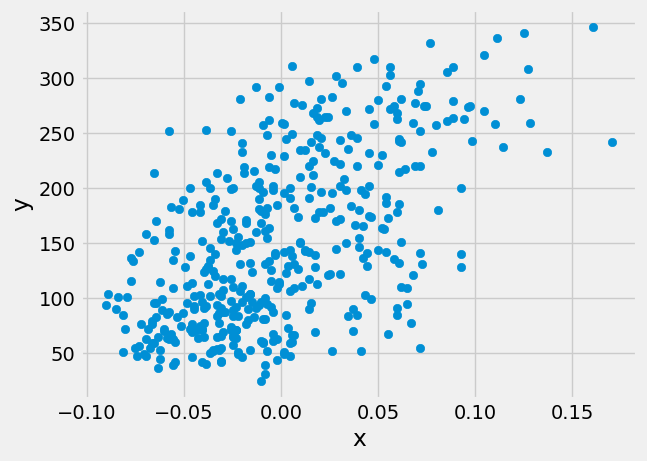

In [536]:
plt.scatter(diabetes.data[:,2], diabetes.target) # 모든 행에서 2번열
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [510]:
df = pd.DataFrame(diabetes.data, columns = diabetes['feature_names'])
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [511]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [513]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

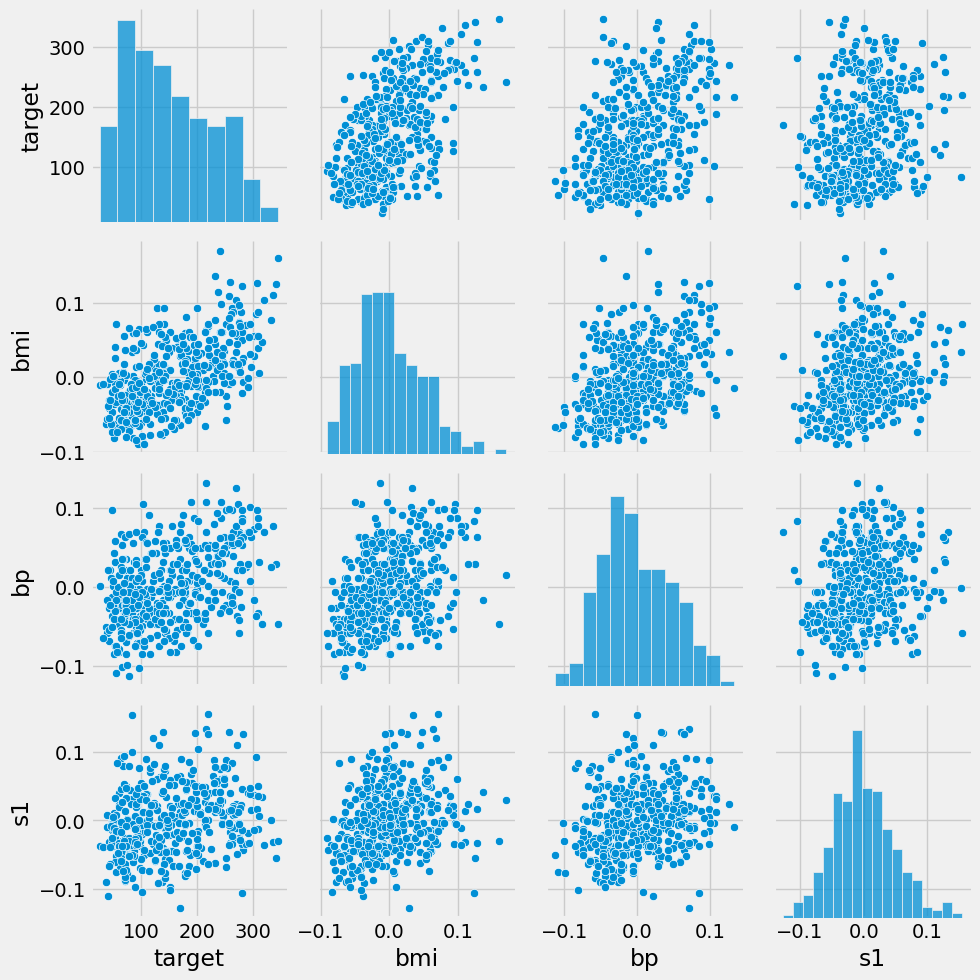

In [514]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

In [515]:
df_corr = df.corr()
df_corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [516]:
cor_order = df_corr.loc[:'s6', 'target'].abs().sort_values(ascending=False)
cor_order

bmi    0.586450
s5     0.565883
bp     0.441484
s4     0.430453
s3     0.394789
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: target, dtype: float64

- 상관계수가(-1~1까지, 0 이면 관계가 없음) 0.5를 넘은 bmi와 s5를 대상으로 산점도와 회귀선을 그려보자.

In [517]:
names = ['target','bmi','s5']
diabetes_df = df.loc[:,names]

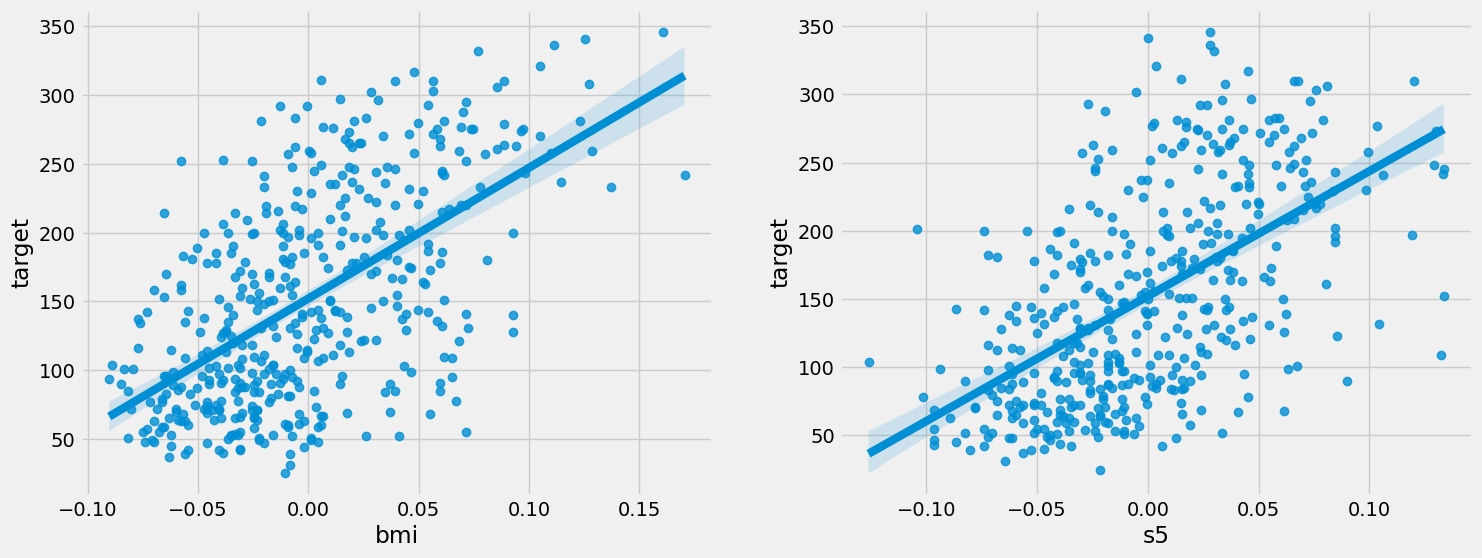

In [518]:
plt.figure(figsize=(16,6))
for i,name in enumerate(names[1:]):
    ax = plt.subplot(1,2,i+1)
    sns.regplot(x=name, y=names[0], data = diabetes_df,ax=ax)
plt.show()

In [519]:
from sklearn.model_selection import train_test_split
x_data=diabetes_df.loc[:,['bmi','s5']]
y_data=diabetes_df.loc[:,'target']
X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [520]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 2) (353,)
(89, 2) (89,)


In [521]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)


0.4741054934306861

In [523]:
print(np.round(lr.coef_,2))
print(np.round(lr.intercept_,2))

[696.73 604.62]
151.73


In [524]:
pred=lr.predict(X_test)

- bmi prediction

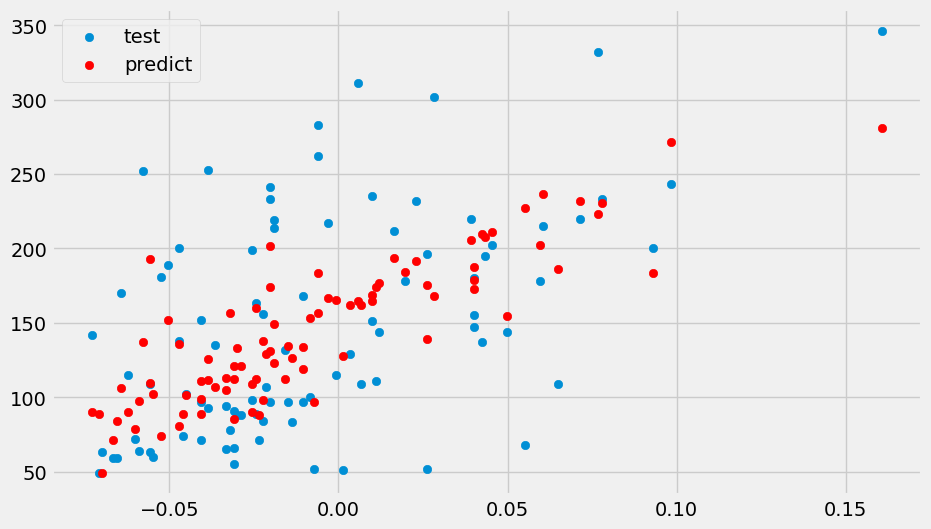

In [525]:
plt.figure(figsize=(10,6))
plt.scatter(X_test['bmi'], y_test, label='test')
plt.scatter(X_test['bmi'], pred, c='r', label='predict')
plt.legend()
plt.show()

- s5 prediction

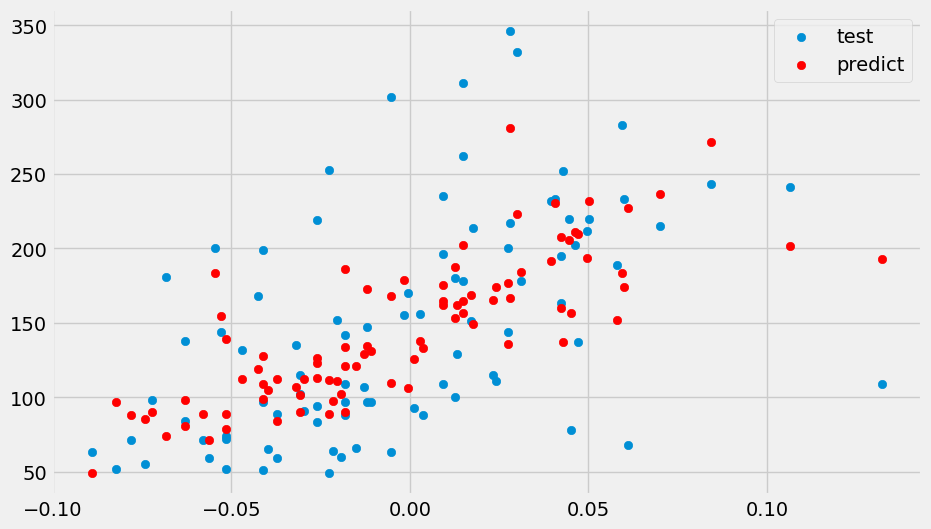

In [527]:
plt.figure(figsize=(10,6))
plt.scatter(X_test['s5'], y_test, label='test')
plt.scatter(X_test['s5'], pred, c='r', label='predict')
plt.legend()
plt.show()

In [528]:
from sklearn.metrics import mean_squared_error

test_pred=lr.predict(X_test)
train_pred=lr.predict(X_train)

train_mse=mean_squared_error(y_train, train_pred)
test_mse=mean_squared_error(y_test, test_pred)

In [529]:
print('train data set RMSE:', round(train_mse**0.5,3))
print('test data set RMSE:', round(test_mse**0.5,3))

train data set RMSE: 56.517
test data set RMSE: 57.045
